<a href="https://colab.research.google.com/github/kim-dahun/python-study/blob/main/py19_yob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/babynames
* 1880년 ~ 2010년까지 연도별로 텍스트(txt) 파일이 저장되어 있음.
* 각 파일에는 '이름, 성별, 신생아수' 가 comma(,)로 구분되어 있음.
* (주의) 컬럼 이름은 파일에 없음.

In [ ]:
col_names = ['name','gender','births'] # 데이터프레임 컬럼 리스트

In [ ]:
# My Code

vers = 1880
yol_list = []
yob = ""
for x in range(1880, 2011):
  file_path = str.format('https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/babynames/yob'+str(x)+'.txt')

  yob = pd.read_csv(file_path, names=col_names)
  yob.insert(3,"year",[x for y in range(0,yob.index.stop)])
  yol_list.append(yob)

# Teach Code

# yobs = []

# for year in range(1880,2011): 연도 반복

#   file_path = f'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/babynames/yob{year}.txt'
#   yob = pd.read_csv(file_path, names=col_names)

#   yob['year'] = year # 불러온 데이터 프레임에 year 열에 year 값들을 등록

#   yobs.append(yob)


In [ ]:
yol_list[0].tail()

,name,gender,births,year
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880
1999,Zachariah,M,5,1880


`pd.read_csv()` 함수는 파일의 첫번째 줄을 데이터 프레임의 컬럼 이름으로 취급함.

CSV 에서는 컬럼 이름이 포함되지 않은 경우(파일의 첫번째 줄부터 데이터가 시작되는 경우)에는 컬럼 이름들을 호출할 때 아규먼트로 전달해야 함.

In [ ]:
yol_list[0].head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
yol_list[0].tail()

,name,gender,births,year
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880
1999,Zachariah,M,5,1880


In [ ]:
yob_df = pd.concat(yol_list, ignore_index=True)

# ignore_index : 기본값 False. True 인 경우에는,
# 각 데이터 프레임들의 기존 인덱스를 무시하고 재색인(re-indexing)을 함.

In [ ]:
yob_df.tail()

,name,gender,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [ ]:
yob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


연도별 신생아 수, 시각화

In [ ]:
x = yob_df.groupby(['year']).year.sum()

year
1880     3760000
1881     3639735
1882     4003014
1883     3924172
1884     4327548
          ...   
2006    68282234
2007    70010181
2008    70292048
2009    69515418
2010    68014380
Name: year, Length: 131, dtype: int64

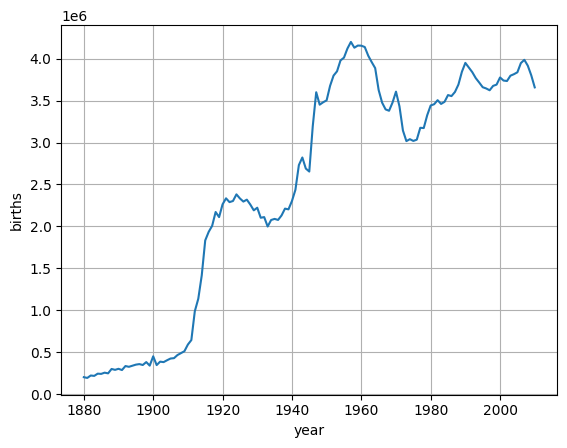

In [ ]:
sns.lineplot(data=yob_df, x='year', y='births',estimator='sum', errorbar=None)
plt.grid()
plt.show()

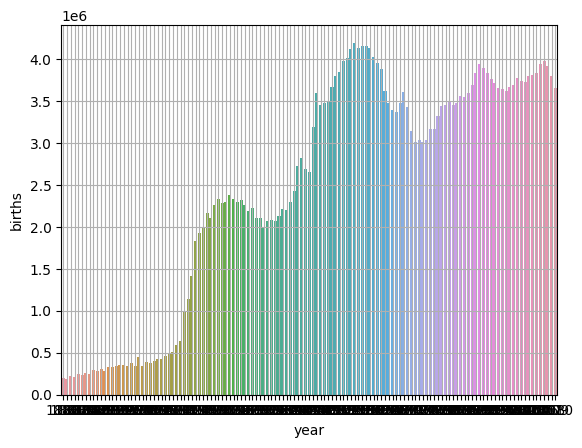

In [ ]:
sns.barplot(data=yob_df, x='year', y='births', estimator='sum', errorbar=None)

plt.grid()
plt.show()

연도별 성별 신생아 수, 시각화

In [ ]:
datas = yob_df

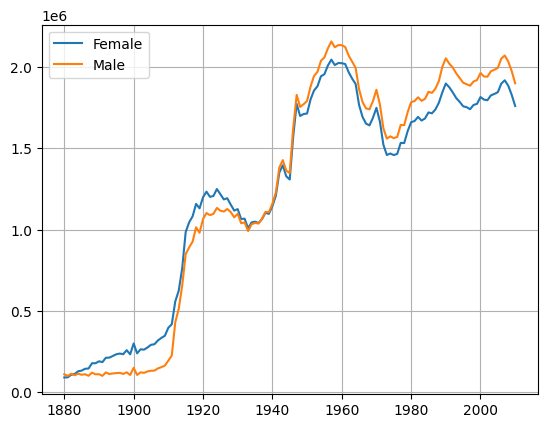

In [ ]:
yg = datas.groupby(['year','gender'])['births'].sum()

births_pivot = datas.pivot_table(values='births', index='year', columns='gender', aggfunc='sum')

plt.plot(births_pivot.index, births_pivot.F, label='Female')
plt.plot(births_pivot.index, births_pivot.M, label='Male')

plt.legend()
plt.grid()
plt.show()



<Axes: xlabel='year', ylabel='births'>

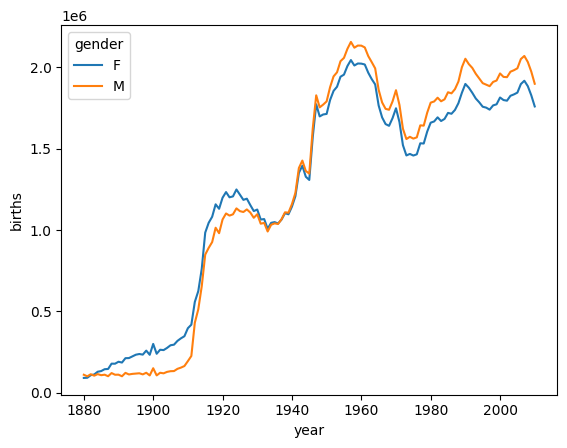

In [ ]:
sns.lineplot(data=datas, x='year', y='births', hue='gender', estimator='sum', errorbar=None)

In [ ]:
df = yg.reset_index()

# reset_index() : Series, DataFrame의 인덱스들을 DataFrame의 컬럼으로 변환

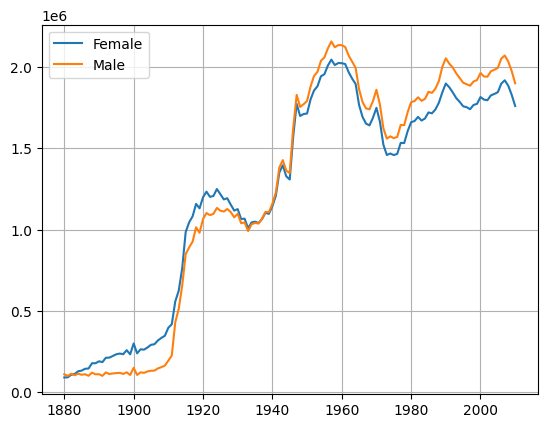

In [ ]:
df

df_male = df[df.gender == 'M']
df_female =df[df.gender == 'F']

plt.plot(df_female.year, df_female.births, label='Female')
plt.plot(df_male.year, df_male.births, label='Male')

plt.legend()
plt.grid()

plt.show()

<BarContainer object of 262 artists>

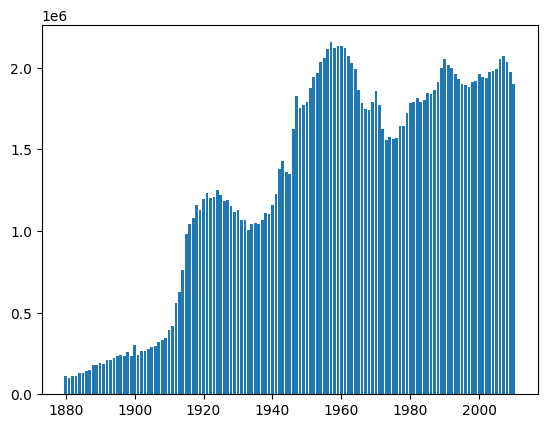

In [ ]:
plt.bar(x=df.year, height = df.births)